In [52]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [53]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

In [54]:
year_start_hist = 1920 #time_subsets[chunk,0]
year_end_hist = 2010 #time_subsets[chunk,1]

# create season strings
years = numpy.arange(year_start_hist, year_end_hist+1, 1).astype(numpy.int)
half_years = numpy.arange(year_start_hist+0.75, year_end_hist, 1)

season_strings_hist = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings_hist = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist=year_end_hist-year_start_hist

In [55]:
year_start_rcp = 2010
year_end_rcp = 2100

# create season strings
years = numpy.arange(year_start_rcp, year_end_rcp+1, 1).astype(numpy.int)
half_years = numpy.arange(year_start_rcp+0.75, year_end_rcp, 1)

season_strings_rcp = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_rcp=year_end_rcp-year_start_rcp

In [56]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

OD_lat = 39.5380
OD_lon = 121.4831 # deg west
OD_lon = 360 - OD_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

In [57]:
working_dir = '/Users/baird/google_drive/_data_analyzed/attribution_2017/storm_counting/'
ca_latlon_regional_indices_array = numpy.load(working_dir + 'ca_latlon_regional_indices_array.npy')
ca_latlon_indices_array = numpy.load(working_dir + 'ca_latlon_indices_array.npy')

ca_latlon_array = numpy.load(working_dir + 'ca_latlon_array.npy')

print(ca_latlon_array.shape)

(65, 2)


In [58]:
lat_unique = numpy.unique(ca_latlon_array[:,0])
lon_unique = numpy.unique(ca_latlon_array[:,1])

LA_model_lat = lat_unique[geo_idx(LA_lat, lat_unique)]
LA_model_lon = lon_unique[geo_idx(LA_lon, lon_unique)]

SF_model_lat = lat_unique[geo_idx(SF_lat, lat_unique)]
SF_model_lon = lon_unique[geo_idx(SF_lon, lon_unique)]

OD_model_lat = lat_unique[geo_idx(OD_lat, lat_unique)]
OD_model_lon = lon_unique[geo_idx(OD_lon, lon_unique)]

In [59]:
# now find where these locations are in the full array
OD_latlon_idx = numpy.where( (OD_model_lat==ca_latlon_array[:,0])&(OD_model_lon==ca_latlon_array[:,1]) )[0]
SF_latlon_idx = numpy.where( (SF_model_lat==ca_latlon_array[:,0])&(SF_model_lon==ca_latlon_array[:,1]) )[0]
LA_latlon_idx = numpy.where( (LA_model_lat==ca_latlon_array[:,0])&(LA_model_lon==ca_latlon_array[:,1]) )[0]

In [60]:
working_dir = '/Users/baird/google_drive/_data_analyzed/attribution_2017/storm_counting/hist_rcp/'
#threshold=0.1
#threshold=0.5
threshold=1.0
#threshold=5.0
#threshold=10.0

In [61]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]
print(ensemble_names)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '101', '102', '103', '104', '105']


In [62]:
dict_OD_list_hist_rcp = []
dict_SF_list_hist_rcp = []
dict_LA_list_hist_rcp = []
for i in range(len(ensemble_names)):
    ensemble_member=ensemble_names[i]
    #member_101_latidx_137_lonidx_191_years_1920-2100_threshold_0.1mmday.npy
    filename_OD = 'member_'+ensemble_member+'_latidx_'+'{:03d}'.format(ca_latlon_indices_array[OD_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[OD_latlon_idx,1][0])+'_years_'+'1920'.format(year_start_hist)+'-'+'2100'.format(year_end_hist)+'_threshold_'+str(threshold)+'mmday.npy'
    filename_SF = 'member_'+ensemble_member+'_latidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,1][0])+'_years_'+'1920'.format(year_start_hist)+'-'+'2100'.format(year_end_hist)+'_threshold_'+str(threshold)+'mmday.npy'
    filename_LA = 'member_'+ensemble_member+'_latidx_'+'{:03d}'.format(ca_latlon_indices_array[LA_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[LA_latlon_idx,1][0])+'_years_'+'1920'.format(year_start_hist)+'-'+'2100'.format(year_end_hist)+'_threshold_'+str(threshold)+'mmday.npy'
    dict_OD_list_hist_rcp.append(numpy.load(working_dir + filename_OD).item())
    dict_SF_list_hist_rcp.append(numpy.load(working_dir + filename_SF).item())
    dict_LA_list_hist_rcp.append(numpy.load(working_dir + filename_LA).item())

print('_latidx_'+'{:03d}'.format(ca_latlon_indices_array[OD_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[OD_latlon_idx,1][0]))
print('_latidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,1][0]))
print('_latidx_'+'{:03d}'.format(ca_latlon_indices_array[LA_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[LA_latlon_idx,1][0]))

_latidx_137_lonidx_191
_latidx_136_lonidx_190
_latidx_132_lonidx_193


In [63]:
#print(dict_LA['402-403'].keys())
#dict_keys(['storm_count', 'precipitation_days', 'seasonal_total', 'storm_length_list', 'storm_magnitude_list'])

print(len(dict_LA_list_hist_rcp))
#print(dict_LA_list_hist_rcp[0].keys())

40


# Daily precipitation histograms

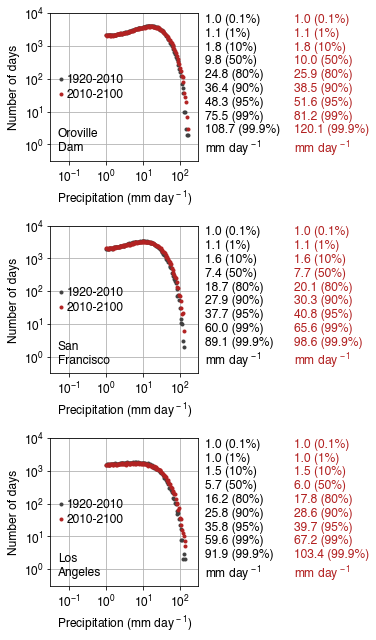

In [64]:
fig = mp.figure(figsize=(3,9))
fontsize=12

# OROVILLE

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_OD_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_OD_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(311)

ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**4)
ax.set_xlim(10**-1.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='Oroville\nDam', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.05,0.5), \
          bbox_transform=ax.transAxes, loc='center left', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

# San Francisco

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_SF_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_SF_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(312)

ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**4)
ax.set_xlim(10**-1.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='San\nFrancisco', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.05,0.5), \
          bbox_transform=ax.transAxes, loc='center left', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

# Los Angeles

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(313)

ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**4)
ax.set_xlim(10**-1.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='Los\nAngeles', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.05,0.5), \
          bbox_transform=ax.transAxes, loc='center left', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

mp.tight_layout()#h_pad=1.5)

mp.savefig('./figs/histogram_loglog_hist_rcp85_precip_days_hist_'+str(year_start_hist)+'-'+str(year_end_hist)+'_rcp_'+str(year_start_rcp)+'-'+str(year_end_rcp)+'_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot.pdf', transparent=True, bbox_inches='tight')

# Zoom 1

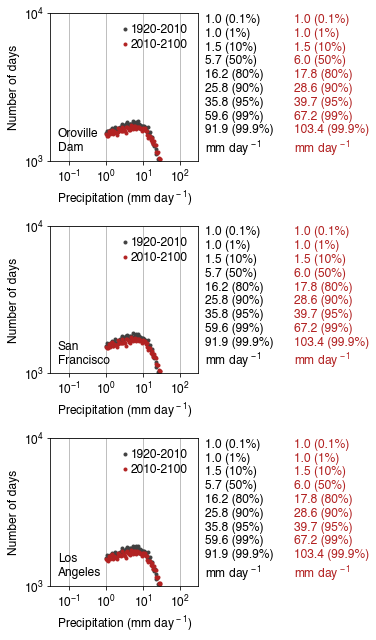

In [48]:
fig = mp.figure(figsize=(3,9))
fontsize=12

# OROVILLE

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(311)

ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**3,10**4)
ax.set_xlim(10**-1.5, 10**2.5)
#ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='Oroville\nDam', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.95,0.95), \
          bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

# San Francisco

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(312)

ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**3,10**4)
ax.set_xlim(10**-1.5, 10**2.5)
#ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='San\nFrancisco', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.95,0.95), \
          bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

# Los Angeles

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(313)

ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**3,10**4)
ax.set_xlim(10**-1.5, 10**2.5)
#ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='Los\nAngeles', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.95,0.95), \
          bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

mp.tight_layout()#h_pad=1.5)

mp.savefig('./figs/histogram_loglog_hist_rcp85_precip_days_hist_'+str(year_start_hist)+'-'+str(year_end_hist)+'_rcp_'+str(year_start_rcp)+'-'+str(year_end_rcp)+'_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot_ZOOM1.pdf', transparent=True, bbox_inches='tight')

# Zoom 2

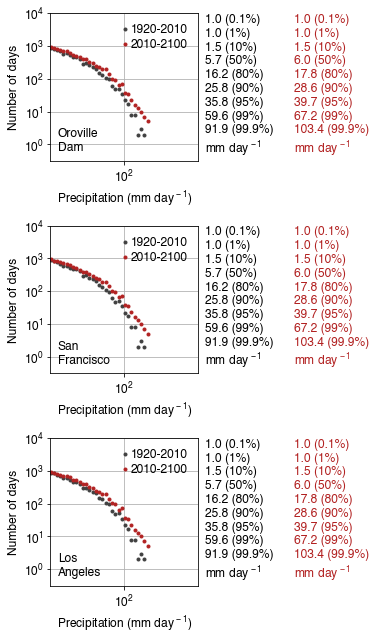

In [49]:
fig = mp.figure(figsize=(3,9))
fontsize=12

# OROVILLE

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(311)

ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**4)
ax.set_xlim(10**1.5, 10**2.5)
#ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='Oroville\nDam', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.95,0.95), \
          bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

# San Francisco

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(312)

ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**4)
ax.set_xlim(10**1.5, 10**2.5)
#ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='San\nFrancisco', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.95,0.95), \
          bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

# Los Angeles

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(313)

ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**4)
ax.set_xlim(10**1.5, 10**2.5)
#ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='Los\nAngeles', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.95,0.95), \
          bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

mp.tight_layout()#h_pad=1.5)

mp.savefig('./figs/histogram_loglog_hist_rcp85_precip_days_hist_'+str(year_start_hist)+'-'+str(year_end_hist)+'_rcp_'+str(year_start_rcp)+'-'+str(year_end_rcp)+'_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot_ZOOM2.pdf', transparent=True, bbox_inches='tight')

# Linear axes scales

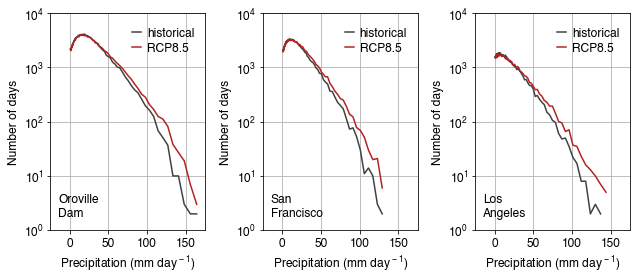

In [50]:
fig = mp.figure(figsize=(9,4))
fontsize=12

# OROVILLE

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_OD_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins_hist = numpy.linspace(threshold,precipitation_days.max(),1000) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_OD_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(131)

#ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
#ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))
ax.plot(bin_centers_hist, histogram_hist, color='0.25', label='historical')
ax.plot(bin_centers_rcp, histogram_rcp, color='firebrick', label='RCP8.5')

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
#ax.set_xscale('log')

ax.set_ylim(10**0,10**4)
ax.set_xlim(-25,175)

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

#ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
#ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='Oroville\nDam', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.95,0.95), \
          bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0.75)

# San Francisco

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_SF_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_SF_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(132)

#ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
#ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))
ax.plot(bin_centers_hist, histogram_hist, color='0.25', label='historical')
ax.plot(bin_centers_rcp, histogram_rcp, color='firebrick', label='RCP8.5')

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
#ax.set_xscale('log')

ax.set_ylim(10**0,10**4)
ax.set_xlim(-25,175)
#ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

#ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
#ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='San\nFrancisco', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
#ax.text(s='Preindustrial\ncontrol', y=0.5, x=0.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.95,0.95), \
          bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0.75)

# Los Angeles

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

perc01_hist = numpy.percentile(precipitation_days, 0.1)
perc1_hist = numpy.percentile(precipitation_days, 1)
perc10_hist = numpy.percentile(precipitation_days, 10)
perc50_hist = numpy.percentile(precipitation_days, 50)
perc75_hist = numpy.percentile(precipitation_days, 75)
perc80_hist = numpy.percentile(precipitation_days, 80)
perc90_hist = numpy.percentile(precipitation_days, 90)
perc95_hist = numpy.percentile(precipitation_days, 95)
perc99_hist = numpy.percentile(precipitation_days, 99)
perc999_hist = numpy.percentile(precipitation_days, 99.9)

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

perc01_rcp = numpy.percentile(precipitation_days, 0.1)
perc1_rcp = numpy.percentile(precipitation_days, 1)
perc10_rcp = numpy.percentile(precipitation_days, 10)
perc50_rcp = numpy.percentile(precipitation_days, 50)
perc75_rcp = numpy.percentile(precipitation_days, 75)
perc80_rcp = numpy.percentile(precipitation_days, 80)
perc90_rcp = numpy.percentile(precipitation_days, 90)
perc95_rcp = numpy.percentile(precipitation_days, 95)
perc99_rcp = numpy.percentile(precipitation_days, 99)
perc999_rcp = numpy.percentile(precipitation_days, 99.9)

ax = fig.add_subplot(133)

#ax.scatter(bin_centers_hist, histogram_hist, color='0.25', marker='.', label=str(year_start_hist)+'-'+str(year_end_hist))
#ax.scatter(bin_centers_rcp, histogram_rcp, color='firebrick', marker='.', label=str(year_start_rcp)+'-'+str(year_end_rcp))
ax.plot(bin_centers_hist[histogram_hist>0], histogram_hist[histogram_hist>0], color='0.25', label='historical')
ax.plot(bin_centers_rcp, histogram_rcp, color='firebrick', label='RCP8.5')

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Number of days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
#ax.set_xscale('log')

ax.set_ylim(10**0,10**4)
ax.set_xlim(-25,175)
#ax.set_xlim(10**-1.5, 10**2.5)
#ax.set_yticks([10**0,10**1,10**2,10**3,10**4])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc_text_hist = \
'{:.1f}'.format(perc01_hist) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_hist) + ' (1%)\n' + \
'{:.1f}'.format(perc10_hist) + ' (10%)\n' + \
'{:.1f}'.format(perc50_hist) + ' (50%)\n' + \
'{:.1f}'.format(perc80_hist) + ' (80%)\n' + \
'{:.1f}'.format(perc90_hist) + ' (90%)\n' + \
'{:.1f}'.format(perc95_hist) + ' (95%)\n' + \
'{:.1f}'.format(perc99_hist) + ' (99%)\n' + \
'{:.1f}'.format(perc999_hist) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

perc_text_rcp = \
'{:.1f}'.format(perc01_rcp) + ' (0.1%)\n' + \
'{:.1f}'.format(perc1_rcp) + ' (1%)\n' + \
'{:.1f}'.format(perc10_rcp) + ' (10%)\n' + \
'{:.1f}'.format(perc50_rcp) + ' (50%)\n' + \
'{:.1f}'.format(perc80_rcp) + ' (80%)\n' + \
'{:.1f}'.format(perc90_rcp) + ' (90%)\n' + \
'{:.1f}'.format(perc95_rcp) + ' (95%)\n' + \
'{:.1f}'.format(perc99_rcp) + ' (99%)\n' + \
'{:.1f}'.format(perc999_rcp) + ' (99.9%)\n' + \
'mm day$^{\, -1}$'

#ax.text(s=perc_text_hist, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
#ax.text(s=perc_text_rcp, y=0.50, x=1.65, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize, color='firebrick')

ax.text(s='Los\nAngeles', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.95,0.95), \
          bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0.75)

mp.tight_layout()#h_pad=1.5)

mp.savefig('./figs/histogram_loglin_hist_rcp85_precip_days_hist_'+str(year_start_hist)+'-'+str(year_end_hist)+'_rcp_'+str(year_start_rcp)+'-'+str(year_end_rcp)+'_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot.pdf', transparent=True, bbox_inches='tight')

[ 1.00954112  0.95762322  1.05411765  0.96120884  0.95599251  0.97060175
  0.99569584  0.9883883   0.98724008  0.95513683  1.01148369  0.99908551
  1.01546861  1.00532151  1.01599289  1.00661084  0.9866724   1.04484493
  0.95376432  0.98498123  0.98620961  0.97619048  0.98354232  0.97384615
  0.93260073  1.02633648  0.98955224  0.94731144  0.99084919  0.96668956
  0.9549458   0.95110671  0.98257373  0.95816033  1.00478774  0.99266055
  0.9657228   0.97061443  0.92032101  0.99970752  0.97823597  0.96968854
  0.99420849  0.99229287  0.98322511  0.97253466  0.97455667  0.94259974
  0.97784491  0.9551266   1.01303585  0.96819527  0.98409543  0.95818902
  0.97370361  0.97066075  0.93063303  0.96018678  0.97577149  0.97576695
  0.94510616  0.97479217  1.00905847  1.01718213  1.01428997  1.01607818
  1.02336145  0.94869215  1.00425683  1.05489443  1.01032205  1.04624277
  1.0653532   1.02389426  1.15798923  1.12681388  1.04969778  1.1864
  1.13597246  1.1742126   1.098778    1.17052375  1.228

/Users/baird/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:182: RuntimeWarning: divide by zero encountered in true_divide


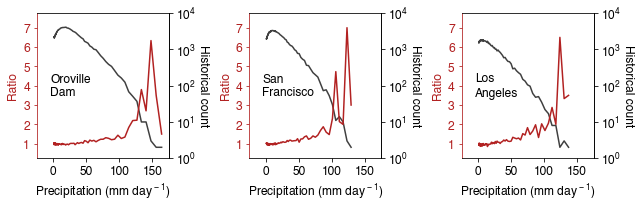

In [51]:
fig = mp.figure(figsize=(9,3))
fontsize=12

# OROVILLE

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_OD_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins_hist = numpy.linspace(threshold,precipitation_days.max(),1000) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_OD_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

print(histogram_rcp/histogram_hist)

ax = fig.add_subplot(131)

ax_twin = ax.twinx()
ax_twin.set_yscale('log')
ax_twin.plot(bin_centers_hist, histogram_hist, color='0.25', label='historical', zorder=0)
ax_twin.tick_params(labelsize=fontsize)
ax_twin.set_yticks([10**0, 10**1, 10**2, 10**3, 10**4])
ax_twin.set_ylabel('Historical count', fontsize=fontsize, rotation=270, labelpad=13)
ax_twin.minorticks_off()
ax_twin.set_axisbelow(True)
ax_twin.spines['top'].set_visible(False)
ax_twin.spines['bottom'].set_visible(False)
ax_twin.spines['left'].set_visible(False)
ax.tick_params(axis='y', color='firebrick', labelcolor='firebrick')
ax.spines['left'].set_color('firebrick')
ax.set_zorder(ax_twin.get_zorder()+1) # put ax in front of ax2 
ax.patch.set_visible(False)

ax.plot(bin_centers_hist, histogram_rcp/histogram_hist, color='firebrick', label='ratio RCP8.5\nto historical')

ax.set_ylim(0.25,7.75)
ax.set_xlim(-25,175)
ax.set_yticks([1,2,3,4,5,6,7])
ax.set_xticks([0,50,100,150])

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Ratio', fontsize=fontsize, color='firebrick')
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)

ax.minorticks_off()
ax.set_axisbelow(True)

ax.text(s='Oroville\nDam', y=0.5, x=0.1, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

# San Francisco

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_SF_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_SF_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(132)

ax_twin = ax.twinx()
ax_twin.set_yscale('log')
ax_twin.plot(bin_centers_hist, histogram_hist, color='0.25', label='historical', zorder=0)
ax_twin.tick_params(labelsize=fontsize)
ax_twin.set_yticks([10**0, 10**1, 10**2, 10**3, 10**4])
ax_twin.set_ylabel('Historical count', fontsize=fontsize, rotation=270, labelpad=13)
ax_twin.minorticks_off()
ax_twin.set_axisbelow(True)
ax_twin.spines['top'].set_visible(False)
ax_twin.spines['bottom'].set_visible(False)
ax_twin.spines['left'].set_visible(False)
ax.tick_params(axis='y', color='firebrick', labelcolor='firebrick')
ax.spines['left'].set_color('firebrick')
ax.set_zorder(ax_twin.get_zorder()+1) # put ax in front of ax2 
ax.patch.set_visible(False)

ax.plot(bin_centers_hist, histogram_rcp/histogram_hist, color='firebrick', label='ratio RCP8.5\nto historical')

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Ratio', fontsize=fontsize, color='firebrick')
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)

ax.set_ylim(0.25,7.75)
ax.set_xlim(-25,175)
ax.set_yticks([1,2,3,4,5,6,7])
ax.set_xticks([0,50,100,150])

ax.minorticks_off()
ax.set_axisbelow(True)

ax.text(s='San\nFrancisco', y=0.5, x=0.1, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.05,0.95), \
          #bbox_transform=ax.transAxes, loc='upper left', borderaxespad=0, labelspacing=0.25, \
          #fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          #handletextpad=0.5, markerscale=1, handlelength=0.75)

# Los Angeles

# histogram of historical accumulation distribution
precipitation_days_list_hist = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_hist]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_hist.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_hist for item in sublist])
bins_hist = numpy.logspace(numpy.log10(threshold),numpy.log10(precipitation_days.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_hist, bin_edges_hist = numpy.histogram(precipitation_days, bins=bins_hist, density=False)
bin_centers_hist = (bin_edges_hist[:-1] + bin_edges_hist[1:])/2
bin_width_hist = numpy.diff(bin_edges_hist) # same as bin_edges[1:]-bin_edges[:-1]

# histogram of rcp8.5 accumulation distribution
precipitation_days_list_rcp = []
for i in range(len(ensemble_names)):
    precipitation_days = [dict_LA_list_hist_rcp[i][s]['precipitation_days'] for s in season_strings_rcp]
    precipitation_days = numpy.array([item for sublist in precipitation_days for item in sublist])  
    precipitation_days_list_rcp.append(precipitation_days)
precipitation_days = numpy.array([item for sublist in precipitation_days_list_rcp for item in sublist])
bins_rcp = bins_hist#numpy.logspace(numpy.log10(threshold),numpy.log10(accumulation_array.max()),100) # log spaced bins
#bins = numpy.linspace(threshold,accumulation_array.max(),100) # linearly spaced bins
histogram_rcp, bin_edges_rcp = numpy.histogram(precipitation_days, bins=bins_rcp, density=False)
bin_centers_rcp = (bin_edges_rcp[:-1] + bin_edges_rcp[1:])/2
bin_width_rcp = numpy.diff(bin_edges_rcp) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(133)

ax_twin = ax.twinx()
ax_twin.set_yscale('log')
ax_twin.plot(bin_centers_hist[histogram_hist>0], histogram_hist[histogram_hist>0], color='0.25', label='historical', zorder=0)
ax_twin.tick_params(labelsize=fontsize)
ax_twin.set_yticks([10**0, 10**1, 10**2, 10**3, 10**4])
ax_twin.set_ylabel('Historical count', fontsize=fontsize, rotation=270, labelpad=13)
ax_twin.minorticks_off()
ax_twin.set_axisbelow(True)
ax_twin.spines['top'].set_visible(False)
ax_twin.spines['bottom'].set_visible(False)
ax_twin.spines['left'].set_visible(False)
ax.tick_params(axis='y', color='firebrick', labelcolor='firebrick')
ax.spines['left'].set_color('firebrick')
ax.set_zorder(ax_twin.get_zorder()+1) # put ax in front of ax2 
ax.patch.set_visible(False)

ax.plot(bin_centers_hist, histogram_rcp/histogram_hist, color='firebrick', label='ratio RCP8.5\nto historical')

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Ratio', fontsize=fontsize, color='firebrick')
ax.set_xlabel('Precipitation (mm day$^{\, -1}$)', fontsize=fontsize)

ax.set_ylim(0.25,7.75)
ax.set_xlim(-25,175)
ax.set_yticks([1,2,3,4,5,6,7])
ax.set_xticks([0,50,100,150])

ax.minorticks_off()
ax.set_axisbelow(True)

ax.text(s='Los\nAngeles', y=0.5, x=0.1, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

mp.tight_layout()#h_pad=1.5)

mp.savefig('./figs/histogram_loglin_hist_rcp85_precip_days_RATIO_hist_'+str(year_start_hist)+'-'+str(year_end_hist)+'_rcp_'+str(year_start_rcp)+'-'+str(year_end_rcp)+'_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot.pdf', transparent=True, bbox_inches='tight')